In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_us = df[df['job_country'] == 'United States']

In [3]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')

C:\Users\Ferdows-PC\AppData\Local\Temp\ipykernel_13616\1699814543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')


In [4]:
df_us_pivot = df_us.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [5]:
df_us_pivot.reset_index(inplace=True)

In [6]:
df_us_pivot['month_no'] = pd.to_datetime(df_us_pivot['job_posted_month'],format='%B')

In [7]:
df_us_pivot['month_no'] = df_us_pivot['month_no'].dt.month

In [8]:
df_us_pivot.sort_values(by='month_no',inplace=True)

In [9]:
df_us_pivot.set_index('job_posted_month',inplace=True)

In [10]:
df_us_pivot.drop(columns= 'month_no')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

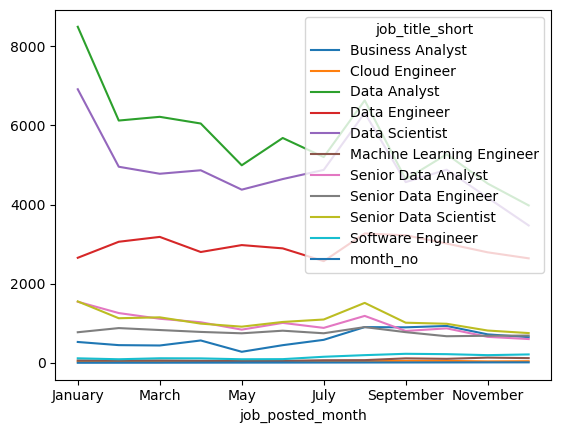

In [11]:
df_us_pivot.plot(kind='line')

In [12]:
top_3_jobs = df_us['job_title_short'].value_counts().head(3).index

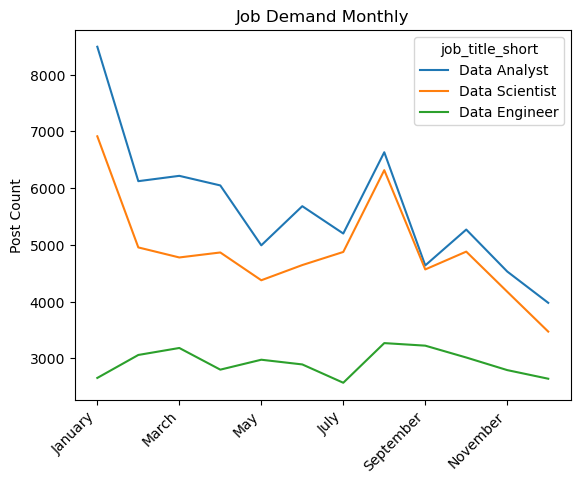

In [13]:
df_us_pivot[top_3_jobs].plot(kind='line')
plt.title('Job Demand Monthly')
plt.ylabel('Post Count')
plt.xlabel(' ')
plt.xticks(rotation=45 , ha = 'right')
plt.show()